<a href="https://colab.research.google.com/github/TrunnMosby/OCR_AdharCard_Identification/blob/main/OCR_ADHARCARD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
! pip install pytesseract
!pip install easyocr

  Created wheel for pytesseract: filename=pytesseract-0.3.7-py2.py3-none-any.whl size=13945 sha256=fa2eb6f1bd609b3683793f8b67be0cd5ca1d6f671762a76e5ec4d0a5290711c5
  Stored in directory: /root/.cache/pip/wheels/81/20/7e/1dd0daad1575d5260916bb1e9781246430647adaef4b3ca3b3
Successfully built pytesseract
     |████████████████████████████████| 62.4MB 63kB/s 


In [15]:
import easyocr
reader=easyocr.Reader(['en'])

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


In [16]:
import matplotlib.pyplot as plt
import cv2

In [21]:
def OCR(img):
  output=reader.readtext(img)
  text=[]
  position=[]
  for i in (output):
    position.append(i[0])
    text.append(i[1])
  
  
  DOB=[]
  PAN=[]
  import re
  pattern=r'\d{2}.\d{2}.\d{4}'
  pattern2=r'[A-Z]'
  for i in text:
    if( len(i)==10 and re.search(pattern2,i)):
      PAN.append(i)
    elif(len(i)==10 and re.search(pattern,i)):
      DOB.append(i)
  location=[]
  dictionary=dict(zip(text,position))
  for i,j in zip(dictionary.keys(),dictionary.values()):
    if(i in DOB):
      location.append(j)
    elif( i in PAN):
      location.append(j)

  
  x_min1,y_min1=[min(i) for i in zip(*location[1])]
  x_max1,y_max1=[max(i) for i in zip(*location[1])]
  x_min2,y_min2=[min(i) for i in zip(*location[0])]
  x_max2,y_max2=[max(i) for i in zip(*location[0])]
  img=cv2.imread(img)
  cv2.rectangle(img,(x_min1,y_min1),(x_max1,y_max1),(0,0,255),2)
  cv2.rectangle(img,(x_min2,y_min2),(x_max2,y_max2),(0,255,0),2)
  cv2.putText(img,'The DOB is'+DOB[0],org=(x_min1-30,y_min1-30) ,fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale= 1, color=(0, 0, 255),thickness= 2)
  cv2.putText(img,'The PAN is'+PAN[0],org=(x_min2-30,y_min2-30) ,fontFace=cv2.FONT_HERSHEY_SIMPLEX,fontScale= 1, color=(0,  255,0),thickness= 2)
  
  
  return plt.imshow(img)


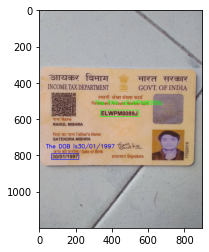

In [10]:
OCR('D1.jpg')

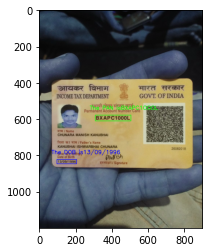

In [22]:
OCR('d8.jpg')